# D0618990 巫逸哲
- [Colab
](https://url.ezwu.me/SAPP-HW3)


# 問題描述
*   統計那些詞語最常出現在諮商輔導中心的標題




# 資料處理流程

## 套件引入

In [1]:
#安裝文字雲PACKAGE
!pip install wordcloud

#安裝jieba斷詞
!pip install jieba

In [0]:
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import requests, jieba, csv, re
import pandas as pd

In [0]:
# 中文圖形相關
%matplotlib inline
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'NotoSerifCJKtc-Black.otf')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=myfont.get_family())
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

## 資料陣列初始化

In [0]:
All_Data = []

## 資料結構定義

In [0]:
class Counseling():
    def __init__(self, ID, Date, Name, Author, URL):
        self.N_ID = ID
        self.N_Date = Date
        self.N_Name = Name
        self.N_Author = Author
        self.N_URL = URL

## 爬蟲 資料擷取

In [0]:
def get_All_Data():
    s = requests.Session()
    url = 'http://www.counseling.fcu.edu.tw/wSite/lp?ctNode=45441&mp=228101&idPath='

    # First get
    page = s.get(url)
    bs_page = BeautifulSoup(page.text, 'html.parser')
    pagesize= bs_page.find_all(attrs={"class":"page"})[0].select('em')[0].text

    # Fix url
    url = 'http://www.counseling.fcu.edu.tw/wSite/lp?ctNode=45441&mp=228101&idPath=&nowPage=1&pagesize=' + pagesize
    page = s.get(url)
    bs_page = BeautifulSoup(page.text, 'html.parser')
    table= bs_page.find(attrs={"summary":"諮商心聞報"})
    part = table.find_all('tr')

    for i in range(len(part)):
        try:
            news_name_re = re.compile(r'(\d\d\d)')
            news_name_span = news_name_re.search(part[i].find_all(attrs={"class":"title"})[0].find('a').text).span(0)

            news_date = part[i].find_all(attrs={"class":"date"})[0].text

            news_name_num = news_name_re.search(part[i].find_all(attrs={"class":"title"})[0].find('a').text).group()

            news_name = part[i].find_all(attrs={"class":"title"})[0].find('a').text[news_name_span[1] + 2 :].lstrip()

            news_author = part[i].find_all('td')[2].text[6:].lstrip().replace("　"," ").split(" ")[0].lstrip()
            
            if (part[i].find_all(attrs={"class":"title"})[0].find('a')['href'][0:2] == 'ct'):
                jump_url = 'http://www.counseling.fcu.edu.tw/wSite/' + part[i].find_all(attrs={"class":"title"})[0].find('a')['href']
                jump_page = s.get(jump_url)
                jump_page_bs_page = BeautifulSoup(jump_page.text, 'html.parser')
                news_url = 'http://www.counseling.fcu.edu.tw/wSite/' + jump_page_bs_page.find_all(attrs={"class":"download"})[0].find('a')['href']

            else:
                news_url = 'http://www.counseling.fcu.edu.tw/wSite/' + part[i].find_all(attrs={"class":"title"})[0].find('a')['href']


            TEMP = Counseling(news_name_num, news_date, news_name, news_author, news_url)
            print(TEMP.N_ID , TEMP, TEMP.N_Name)
            
            All_Data.append(TEMP)

        except:
            print()

    return All_Data

In [7]:
get_All_Data()


429 <__main__.Counseling object at 0x7f2463674320> 寫什麼好呢？
428 <__main__.Counseling object at 0x7f24636744a8> 關於「失落」這件大事
427 <__main__.Counseling object at 0x7f2463668128> 等待通往改變的終點站
426 <__main__.Counseling object at 0x7f24635d1128> 淺談網路成癮
425 <__main__.Counseling object at 0x7f2463656390> 短文
424 <__main__.Counseling object at 0x7f2463532c18> 情緒照顧
423 <__main__.Counseling object at 0x7f246351dc18> 淺談焦慮症
422 <__main__.Counseling object at 0x7f2463648390> 對於痛苦的想像力
421 <__main__.Counseling object at 0x7f2463488cc0> 你是怕生?害羞?還是社交畏懼症
420 <__main__.Counseling object at 0x7f24633f0cc0> 讓自己變好
419 <__main__.Counseling object at 0x7f24633dbcc0> 我學習上有困難，但我不笨——認識學習障礙
418 <__main__.Counseling object at 0x7f246347edd8> 如何與情緒行為障礙學生相處
417 <__main__.Counseling object at 0x7f2463397dd8> 再思同理心
416 <__main__.Counseling object at 0x7f2463348dd8> 「復仇式色情(revenge porn)」，拒絕成為共犯
415 <__main__.Counseling object at 0x7f2463382e80> 跑去當一天志工，心情超複雜
414 <__main__.Counseling object at 0x7f24633521d0> 我有憂鬱症嗎？
413 <__mai

## 寫檔 資料儲存

In [0]:
with open('諮商輔導中心.csv', 'w', newline='') as csvfile:
    # 建立 CSV 檔寫入器
    writer = csv.writer(csvfile)

    writer.writerow(['ID', '發刊日', '標題', '提供者', '文章網址'])
    
    for data in All_Data:
        # print(data.N_ID, data.N_Date, data.N_Name)
        writer.writerow([data.N_ID, data.N_Date, data.N_Name, data.N_Author, data.N_URL])

## 內容分析

In [9]:
All_str = ''
for data in All_Data:
    All_str += (data.N_Name + ' ')
print(All_str)

寫什麼好呢？ 關於「失落」這件大事 等待通往改變的終點站 淺談網路成癮 短文 情緒照顧 淺談焦慮症 對於痛苦的想像力 你是怕生?害羞?還是社交畏懼症 讓自己變好 我學習上有困難，但我不笨——認識學習障礙 如何與情緒行為障礙學生相處 再思同理心 「復仇式色情(revenge porn)」，拒絕成為共犯 跑去當一天志工，心情超複雜 我有憂鬱症嗎？ 認識「性別平等意識」 為自己演出滿意的生命劇本 你走了，我怎麼辦？-悲傷之後 自由權與尊重的距離 美好人生的起手式 做自己的生命設計師 我好痛，可以不要再罵我了嗎？ 練習與情緒作伴 淺談大學生的親密關係暴力 精神分裂症(Schizophrenia)更名為「思覺失調症」 不一樣與一樣 你在網路中出賣了你自己？！ 拿掉完美濾鏡，面對真實自己 一起認識亞斯伯格症 成為『創傷』知情人 帶著「害怕」去找「勇氣」 認出你自己 快樂很簡單 你如何看待「負面情緒」呢 輔具科技在手機APP的應用 當一個合適的陪伴者 聽覺障礙生的辛苦 謝謝自己的勇氣 別忘了愛自己 走一段身傷心痛的復原幽徑 自閉症學生的困擾與因應 我生病了 使用網路適度不過度 生涯議題與親子關係 同志的親密暴力 侏儒不認命 讀書分享；放鬆之書 為好關係「推一把」 自卑這種心魔 親密關係亮紅燈-如何辨別親密關係暴力 如何在公共場合處理孩子的情緒及問題行為 CCR行不行？談跨文化親密關係 用「心」溝通，有「心」無礙 成癮與人際關係 你擁有多少快樂資本 自殺防治~傾聽那心靈幽谷的聲音~ 告別迷惘，走自己的路 為什麼有些聰明的人無法閱讀 陪。自己 面對自閉症患者－可以多一分理解與寬容 杜鄉的微笑 臣服，需要練習 永恆少年/少女 『創傷』教會我們的事 旅蛙 羽生結弦「絕對要贏」的氣魄與孤行 你可以更快樂! 陪伴經歷失落經驗者之原則 防衛之下，渴望之中，完美管家的啟示 道歉也需要學習的 正念 -飲食靜觀的練習與體會 在關係中，盡力而為就好 認識注意力不足過動症(ADHD) 新鮮人的必修課！愛情來了～ 接納「煩惱」改變一小步 網路遊戲與學習投入 恐怖情人退散！戀愛保命符 酸酸甜甜的滋味 親密關係暴力事件發生，如何和學生擬定在校園的安全計畫 接納自己的挫折經驗 學會為自己負責的機會 好好說分手 偏鄉小學心理師的反思：貧窮的優勢 孩子擁有「很明理的父母」也為難 傾聽「標籤」下的聲音 與自己親密深度

In [0]:
#分割中文字和英文字串
def group_words(s):
    return re.findall('[\u4e00-\u9fff]|[a-zA-Z0-9]+', s)

words=group_words(All_str)

In [11]:
# Use: https://github.com/fxsjy/jieba/tree/master/extra_dict

jieba.load_userdict('dict.txt.big.txt')
segment = list(jieba.cut(All_str))
print(segment[:10])

seg_text = ' '.join(segment)
print(seg_text[:100])

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.844 seconds.
Prefix dict has been built succesfully.


['寫', '什麼', '好', '呢', '？', ' ', '關於', '「', '失落', '」']
寫 什麼 好 呢 ？   關於 「 失落 」 這件 大事   等待 通往 改變 的 終點站   淺談 網路 成癮   短文   情緒 照顧   淺談 焦慮症   對於 痛苦 的 想像力   你 是 怕


# 文字雲結果
 

In [0]:
wordcolud = WordCloud(font_path='/content/NotoSerifCJKtc-Black.otf', max_words=100).generate(All_str)

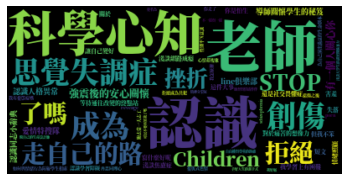

In [25]:
plt.figure()
plt.imshow(wordcolud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
wordcolud = WordCloud(font_path='/content/NotoSerifCJKtc-Black.otf', max_words=100).generate(seg_text)

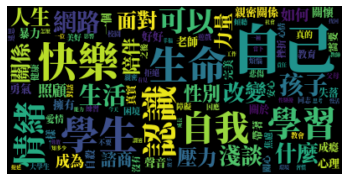

In [28]:
plt.figure()
plt.imshow(wordcolud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 問題討論

*  正確性：大概算中上吧? 用了結巴斷詞，還有直接分析。感覺結果都跟該去輔導有點關係。



# 實作心得

> 文字雲的運用在一些資料之中將最常出現的抓出來，實作起來算有趣的，再來雖然大多數情況下能讓使用者大概了解整個資料的大部分內容，不過或許需要更龐大的字典才能應付各種斷詞。

> By 巫逸哲

